In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
gc.collect()

#test_data=pd.read_csv(r'C:\Users\adfatwan\Desktop\Aditsi Fatwani\ames_test.csv')
#train_data=pd.read_csv(r'C:\Users\adfatwan\Desktop\Aditi Fatwani\ames_train.csv')




# to solve missing values:: We do have standard missing values like Nan, but we do not have non standard missing values. 
#Although we have handles non missing as well over here
Chunksize=10
missing_values=["NaN","na","-","--"]
train_data=pd.read_csv(r'C:\Users\adfatwan\Desktop\DS\ames_regression-20220723T071903Z-001\ames_regression\ames_train.csv', chunksize=Chunksize,na_values=missing_values)

my_list=[]

for chunk in pd.read_csv(r'C:\Users\adfatwan\Desktop\DS\ames_regression-20220723T071903Z-001\ames_regression\ames_train.csv',chunksize=Chunksize):
    my_list.append(chunk)
    #print(chunk.shape)
    #print("="*66)
    #print(chunk.head(2))
    #print("="*66)


train_data=pd.concat(my_list,axis=0)
print(len(train_data))



# to see all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



1460


In [268]:

# checking duplicates in whole dataset and dropping them
train_data.duplicated()
train_data.drop_duplicates(inplace=True)
train_data = train_data.reset_index(drop=True)

In [269]:

train_data.isna().sum() # We have missing values. Finding the realtionship between missing values and target column is important through graph to understand what is teh effect and based on that we need to think if yu want to drop thoe missing values or not


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [270]:


# Numerical Variables
train_data_numeric=[columns for columns in train_data.columns if train_data[columns].dtypes!='O'] # O means object here
len(train_data_numeric)

# list of variables that contain year information
train_data_yr = [feature for feature in train_data_numeric if 'Yr' in feature or 'Year' in feature]



In [271]:
# discrete Variables
discrete_col=[columns for columns in train_data_numeric if len(train_data[columns].unique())<25 and columns not in train_data_yr+['Id' ]]
len(discrete_col)

# continous variable
continous_col=[columns for columns in train_data_numeric if columns not in discrete_col and columns not in train_data_yr+['Id']]
len(continous_col)



16

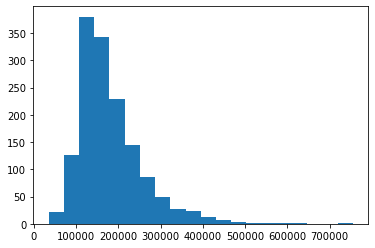

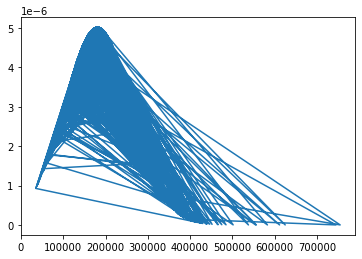

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [272]:
#EDA

# Again there are 3 methods Histogram, boz plot and scatter plt

# Lets see Histogram for Saleprice

import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

mean = statistics.mean(train_data.SalePrice)
sd = statistics.stdev(train_data.SalePrice)
fig_salesprice = plt.hist(x=train_data['SalePrice'],bins=20)

plt.show()
    
plt.plot(train_data.SalePrice, norm.pdf(train_data.SalePrice, mean, sd))
plt.show()



train_data.describe()

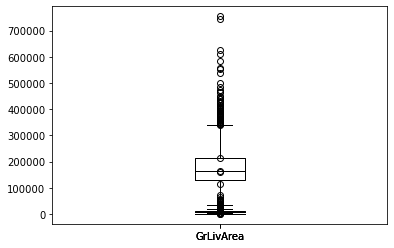

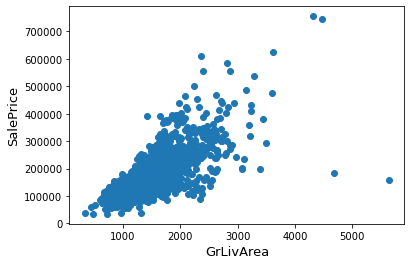

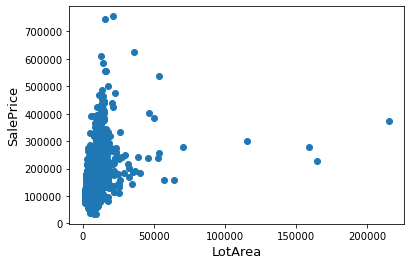

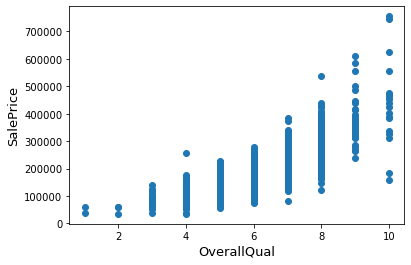

In [273]:
# Univariate and Bivariate Analysis


train_data.boxplot(column=['SalePrice'], grid=False, color='black')

train_data.boxplot(column=['LotArea'], grid=False, color='black')

train_data.boxplot(column=['GrLivArea'], grid=False, color='black')

fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()



fig, ax=plt.subplots()
ax.scatter(x = train_data['LotArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

fig, ax=plt.subplots()
ax.scatter(x = train_data['OverallQual'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()


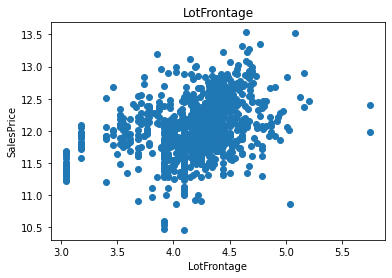

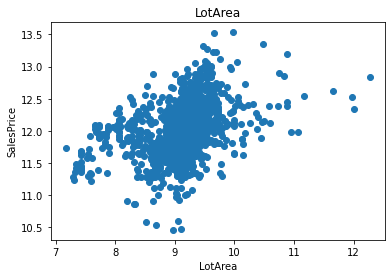

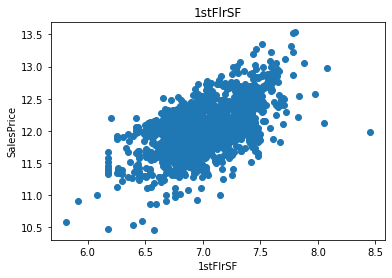

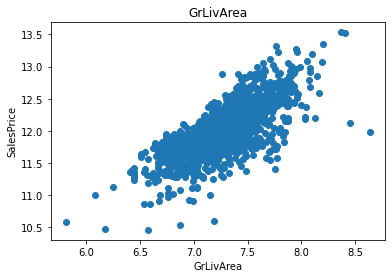

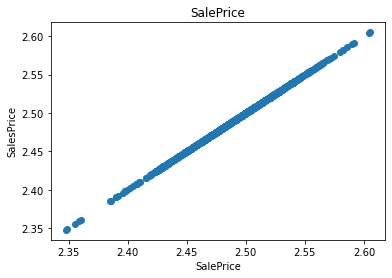

In [274]:
for col in continous_col:
    data=train_data.copy()
    if 0 in data[col].unique():  #Log0 would give infinity so skipping 0 values
        pass
    else:
        data[col]=np.log(data[col])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[col],data['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalesPrice')
        plt.title(col)
        plt.show()

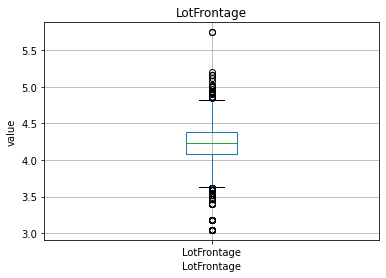

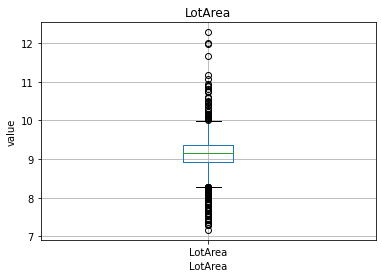

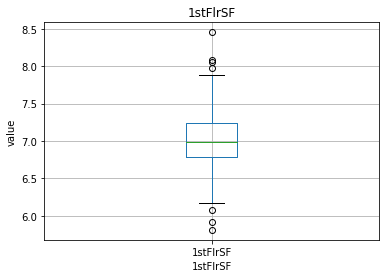

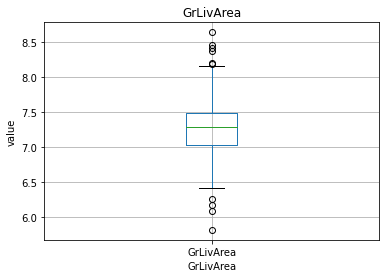

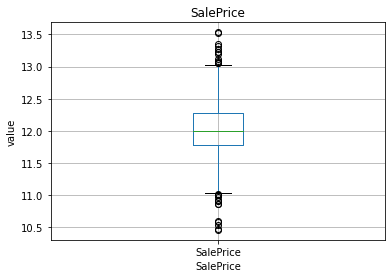

In [275]:
# Outliers, we analyse for only continous numerical variables and we dont this for categoriacal variables

for col in continous_col:
    data=train_data.copy()
    if 0 in data[col].unique():  #Log0 would give infinity so skipping 0 values
        pass
    else:
        data[col]=np.log(data[col])
        data.boxplot(column=col)
        plt.xlabel(col)
        plt.ylabel('value')
        plt.title(col)
        plt.show()

In [276]:
# Categorical Variables
cat_cols=[cols for cols in train_data.columns if train_data[cols].dtypes=='O']
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [277]:
# To find cardinality for every categorical column

for col in cat_cols:
    print('The column is {} and no of categories are {}'.format(col,len(train_data[col].unique())))

The column is MSZoning and no of categories are 5
The column is Street and no of categories are 2
The column is Alley and no of categories are 3
The column is LotShape and no of categories are 4
The column is LandContour and no of categories are 4
The column is Utilities and no of categories are 2
The column is LotConfig and no of categories are 5
The column is LandSlope and no of categories are 3
The column is Neighborhood and no of categories are 25
The column is Condition1 and no of categories are 9
The column is Condition2 and no of categories are 8
The column is BldgType and no of categories are 5
The column is HouseStyle and no of categories are 8
The column is RoofStyle and no of categories are 6
The column is RoofMatl and no of categories are 8
The column is Exterior1st and no of categories are 15
The column is Exterior2nd and no of categories are 16
The column is MasVnrType and no of categories are 5
The column is ExterQual and no of categories are 4
The column is ExterCond an

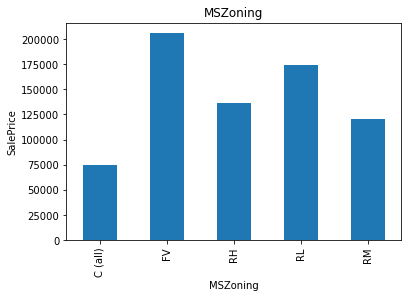

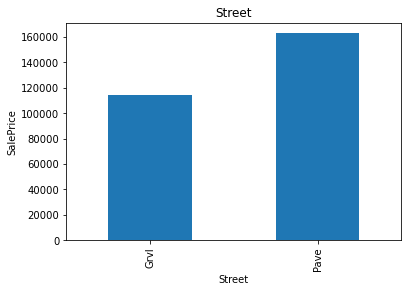

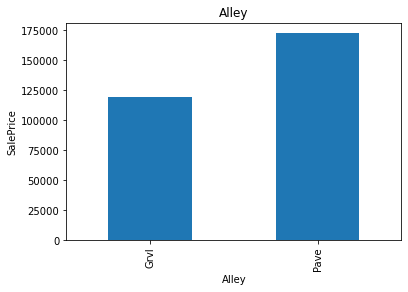

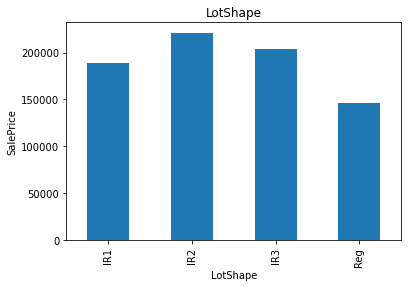

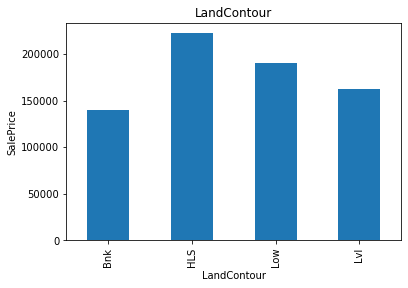

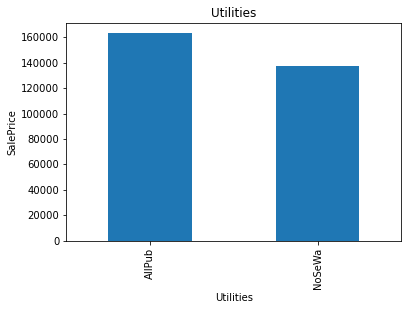

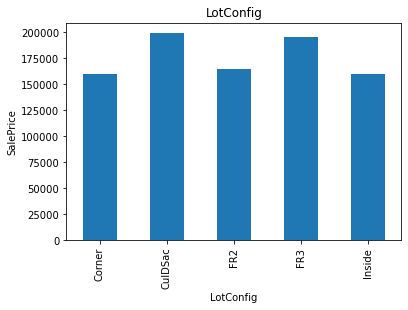

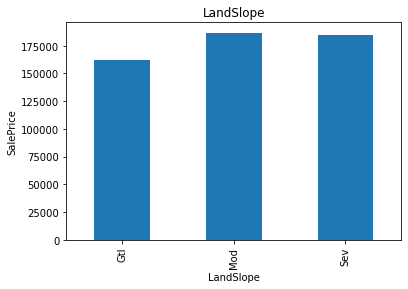

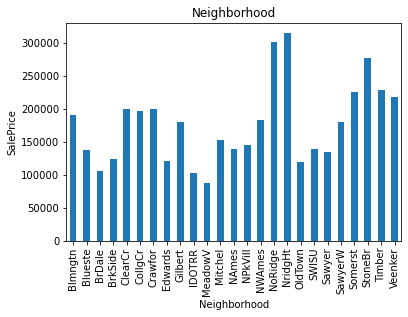

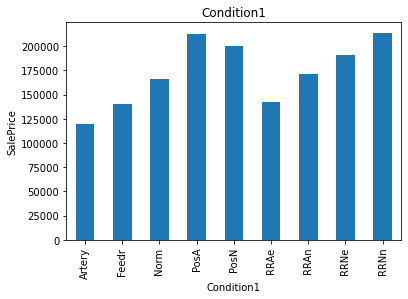

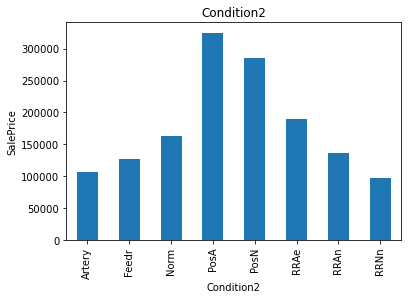

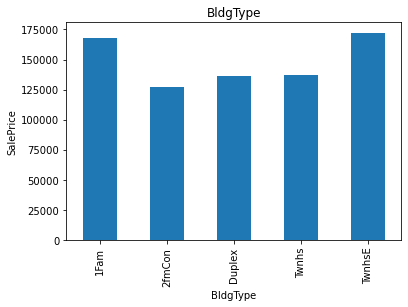

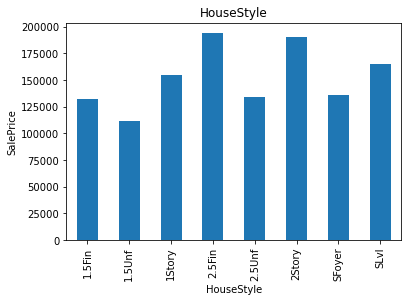

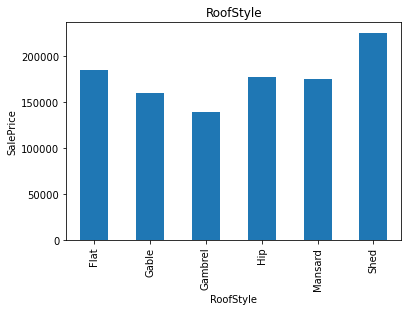

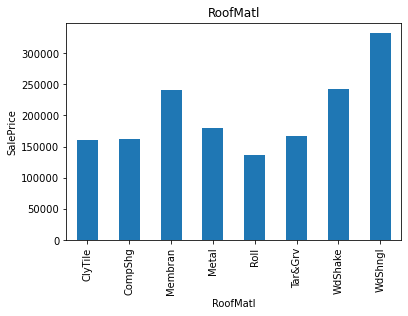

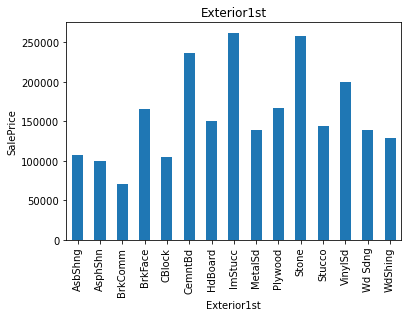

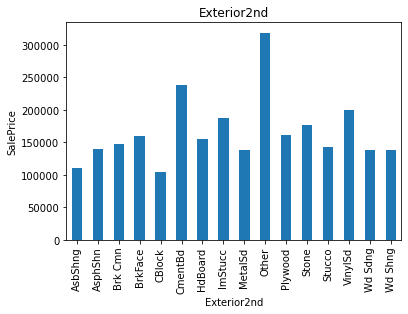

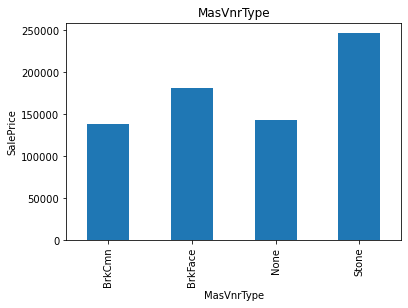

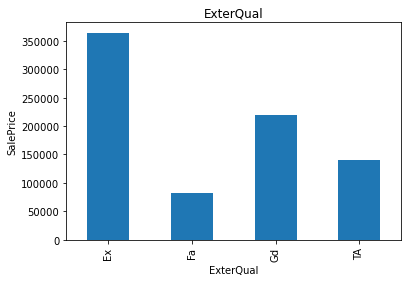

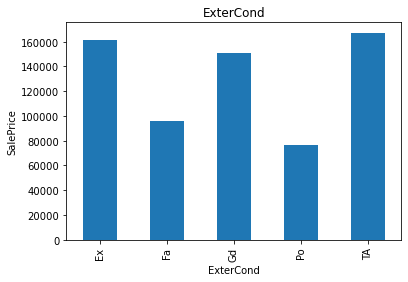

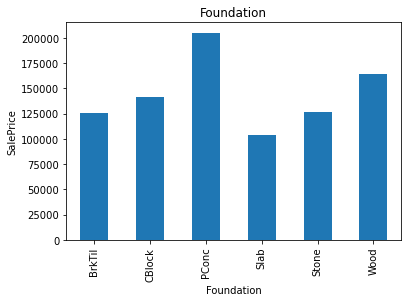

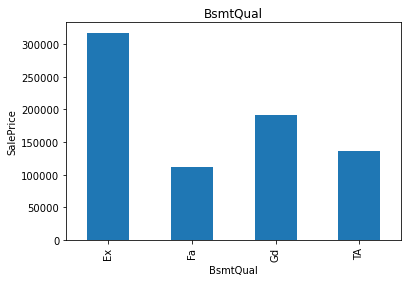

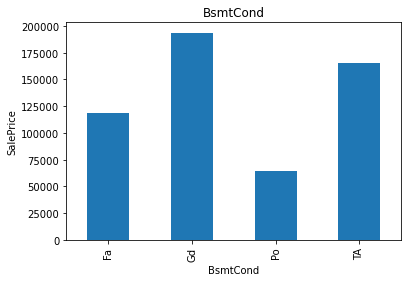

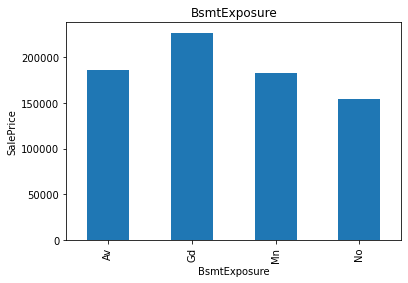

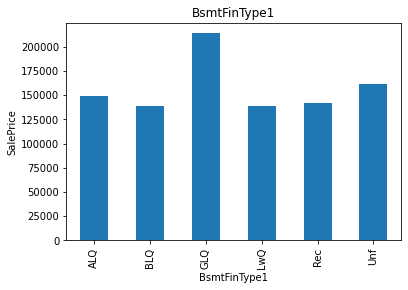

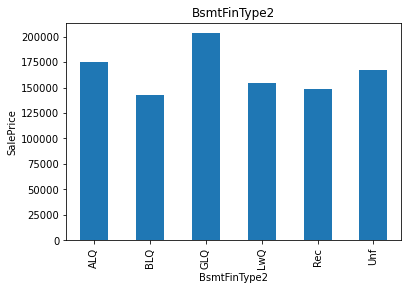

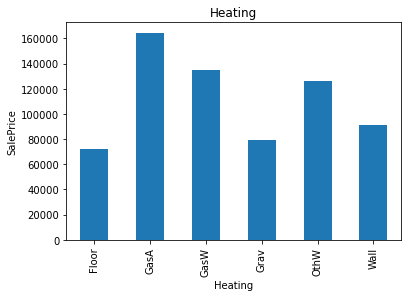

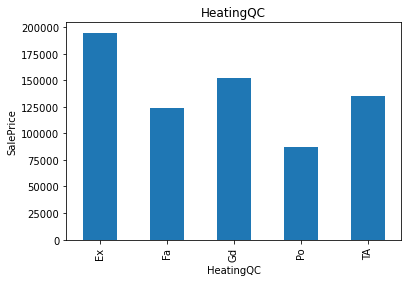

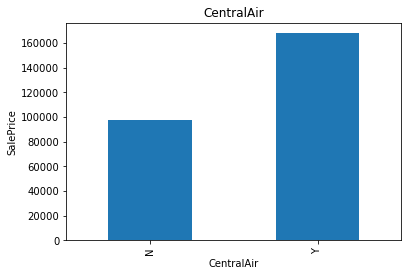

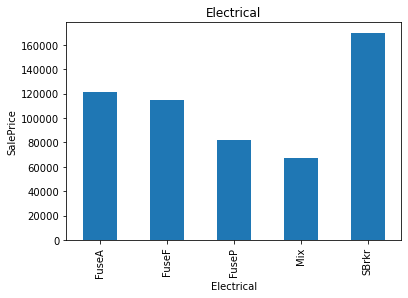

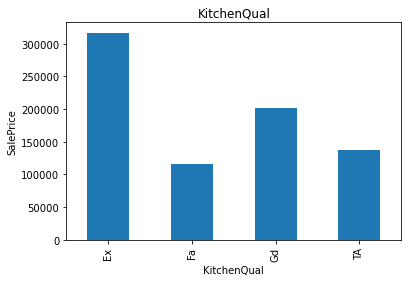

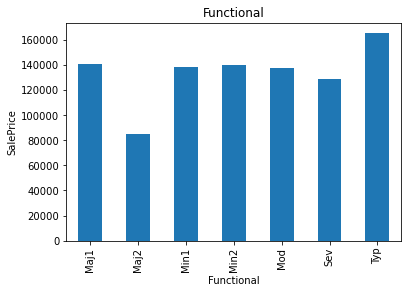

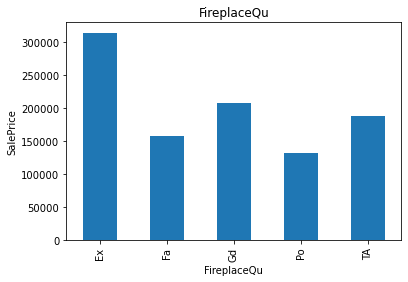

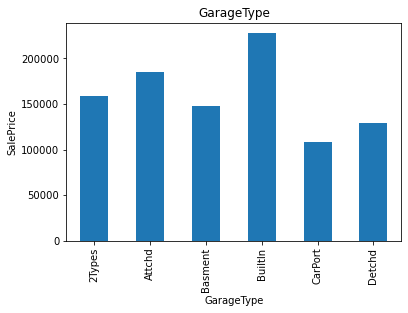

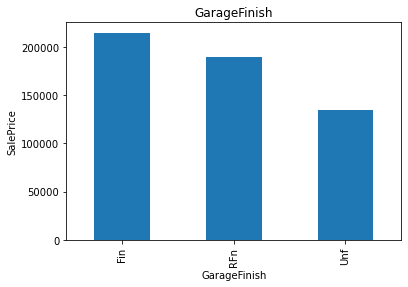

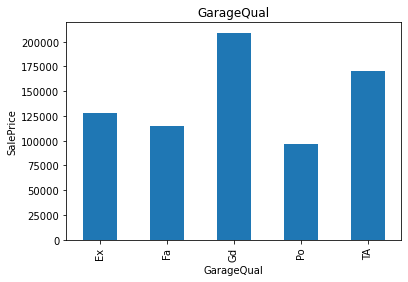

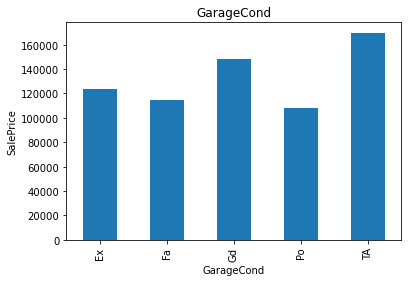

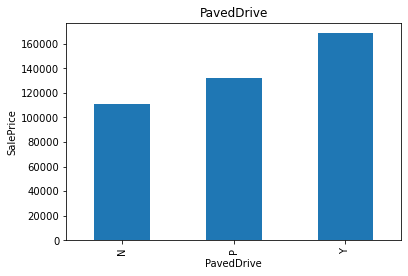

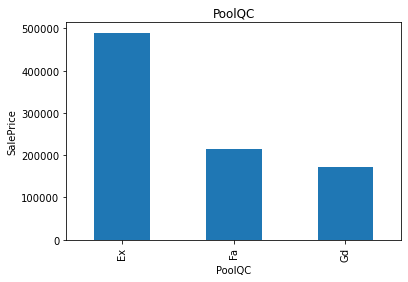

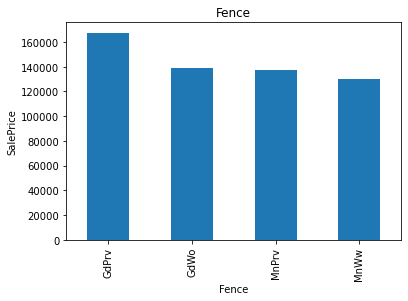

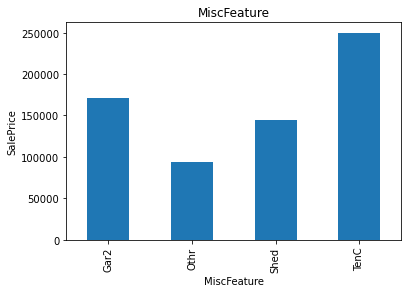

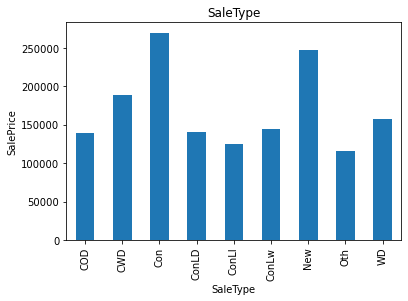

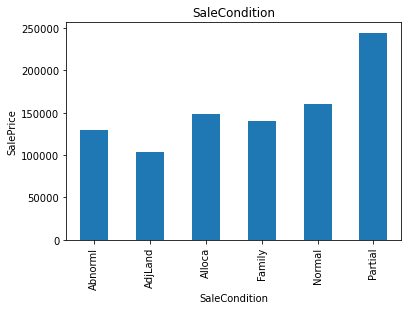

In [278]:
# Relationship between categorical variable and Target variable
for col in cat_cols:
    data=train_data.copy()
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

In [279]:
# Handling Missing values in Categorical colms & Numerical columns

# Categorical cols- Finding Nulls in Categorical columns
cat_cols_nan=[cols for cols in train_data.columns if train_data[cols].isnull().sum()>1 and train_data[cols].dtypes=='O']
cat_cols_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [280]:
# Relace Nan value sin cat_cols-nan with new Label

## Replace missing value with a new label
def replace_cat_feature(train_data,features_nan):
    data=train_data.copy()
    data[cat_cols_nan]=data[cat_cols_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(train_data,cat_cols_nan)

train_data[cat_cols_nan].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [281]:
# Missing value check for numerical variable
num_cols_nan=[cols for cols in train_data.columns if train_data[cols].isnull().sum()>1 and train_data[cols].dtypes!='O']

In [282]:

# Handling Numerical Vraiables
for cols in num_cols_nan:
    median_val=train_data[cols].median()
    train_data[cols+'Nan']=np.where(train_data[cols].isnull(),1,0)
    train_data[cols].fillna(median_val,inplace=True)

train_data[num_cols_nan].isnull().sum()


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [283]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5

In [284]:

# percentage of categories less that 1% got replaced to Rare coz so high cardinality is present

for cols in cat_cols:
    temp=train_data.groupby(cols)['SalePrice'].count()/len(train_data)
    temp_df=temp[temp>0.01].index 
    train_data[cols]=np.where(train_data[cols].isin(temp_df),train_data[cols],'Rare')

<AxesSubplot:>

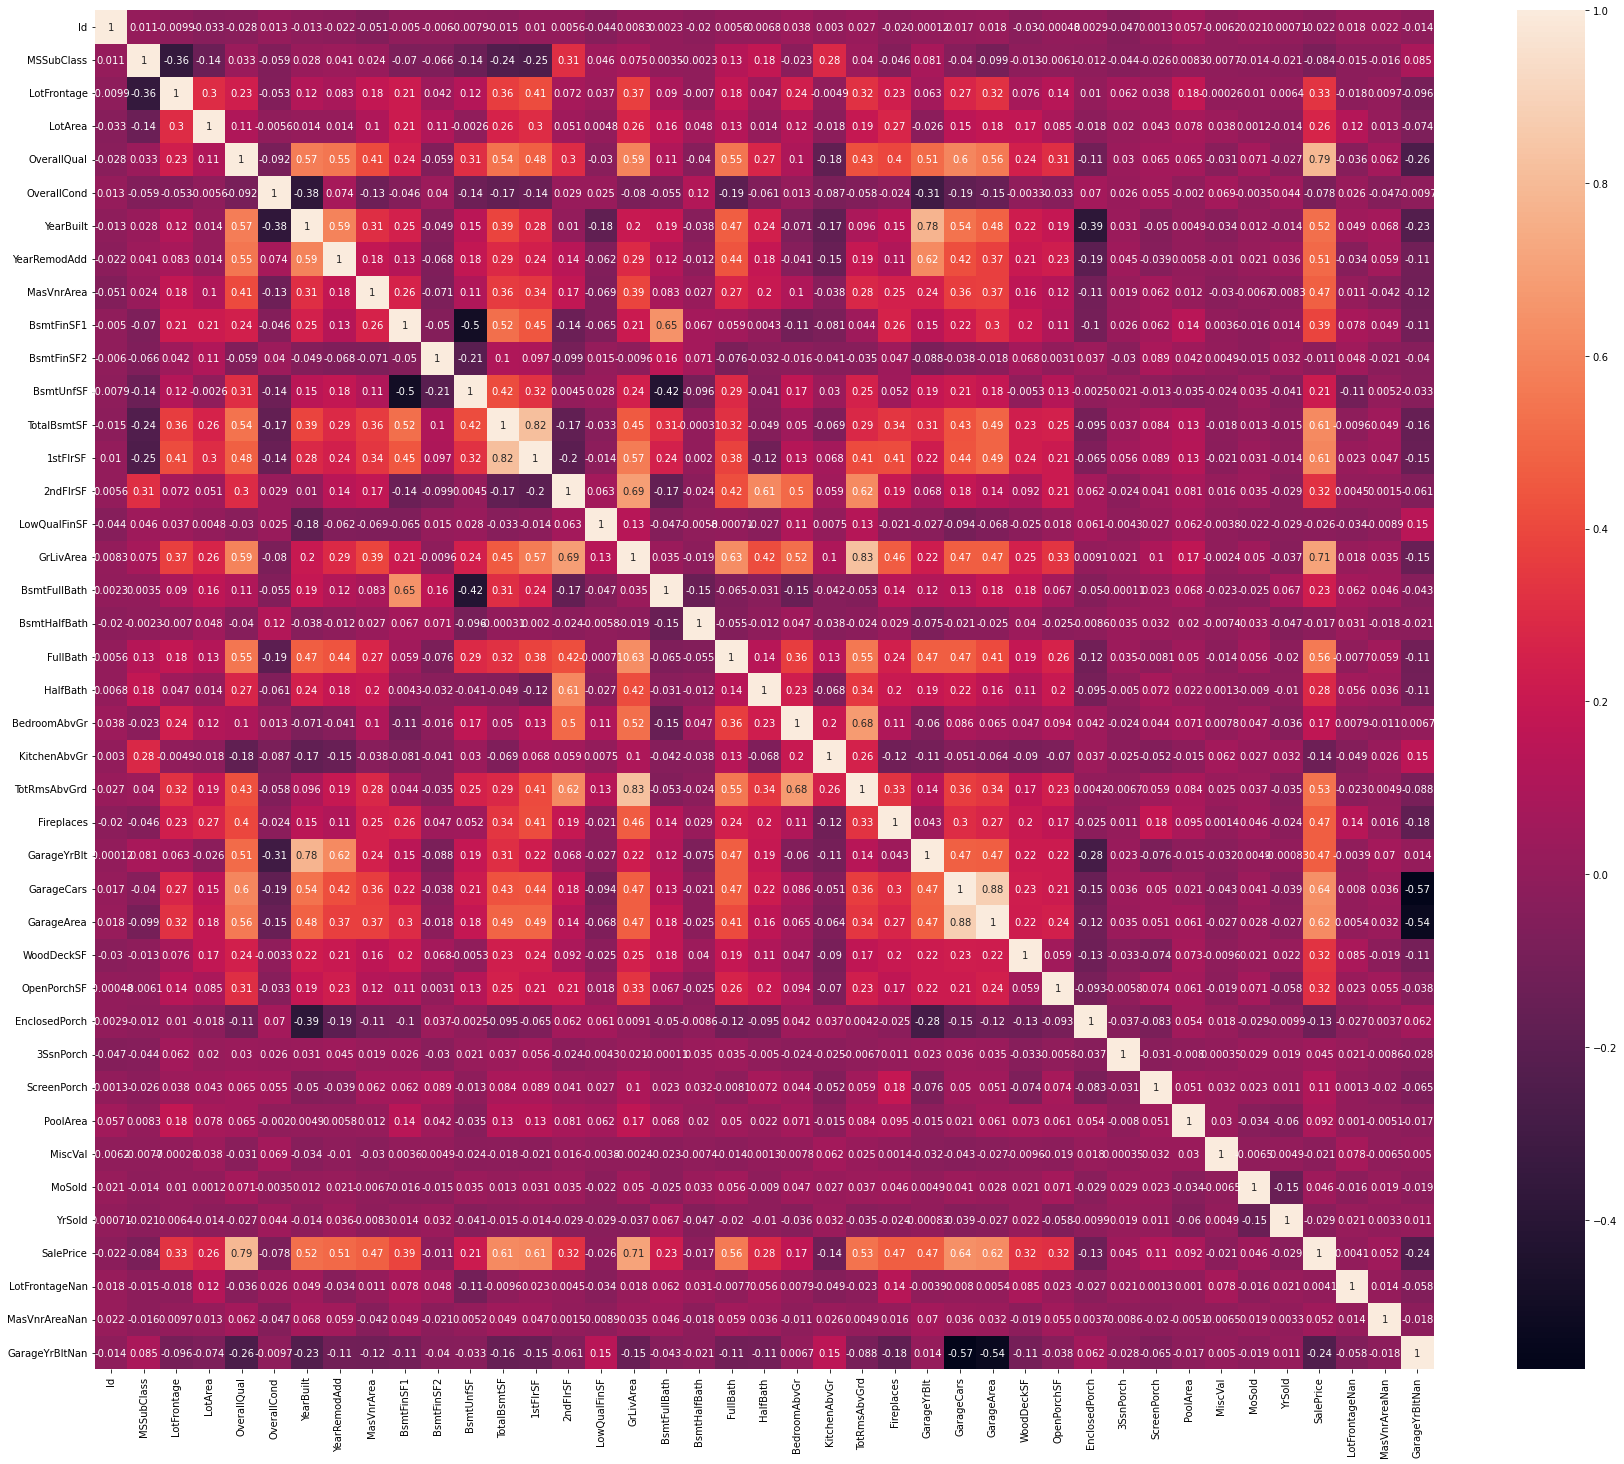

In [285]:
# Correlataion
plt.figure(figsize=(30,25))
sns.heatmap(train_data.corr(),annot=True)

In [286]:
data=train_data.copy()


In [287]:
# Encoding of Categorical columns
train_cat=pd.DataFrame()
for feature in cat_cols:
    labels_ordered=train_data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_data[feature]=train_data[feature].map(labels_ordered)
    
for col in cat_cols:
    train_cat[col]=train_data[col]


In [288]:
# Feature scaling, we need not need to do feature scaling on ID column coz it can be dropped later. Also need not to be done on SalePrice


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing  import MinMaxScaler


train_data_scale=pd.DataFrame()
for col in train_data_numeric:
    train_data_scale[col]=train_data[col]


#col_scale=[cols for cols in train_data.columns if cols not in cat_cols]
train_data_scale=train_data_scale.drop(['Id'],axis=1)
scaler=MinMaxScaler()
num_col_scaled= scaler.fit_transform(train_data_scale)
num_scaled=pd.DataFrame(num_col_scaled,columns=train_data_scale.columns)
dataset=pd.concat([train_cat,num_scaled],axis=1)
dataset_no_scaled=pd.concat([train_cat,train_data_scale],axis=1)
dataset.head(10)
    

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,2,0,1,1,0,0,15,4,1,4,5,0,0,9,9,2,2,3,4,3,2,1,6,4,2,4,1,3,2,4,1,3,2,2,2,2,0,3,1,2,3,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.00000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.50,0.241078
1,3,1,2,0,1,1,1,0,12,1,1,4,4,0,0,1,2,1,1,3,2,3,2,4,4,4,2,4,1,3,1,4,3,3,2,2,2,2,0,3,1,2,3,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.00000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.363636,0.25,0.203583
2,3,1,2,1,1,1,0,0,15,4,1,4,5,0,0,9,9,2,2,3,4,3,2,2,6,4,2,4,1,3,2,4,3,3,2,2,2,2,0,3,1,2,3,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.00000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.000000,0.0,0.0,0.000000,0.727273,0.50,0.261908
3,3,1,2,1,1,1,2,0,16,4,1,4,5,0,0,2,4,1,1,3,1,2,3,1,4,4,2,3,1,3,2,4,4,1,1,2,2,2,0,3,1,2,0,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.00000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.000000,0.0,0.0,0.000000,0.090909,0.00,0.145952
4,3,1,2,1,1,1,1,0,22,4,1,4,5,0,0,9,9,2,2,3,4,3,2,3,6,4,2,4,1,3,2,4,3,3,2,2,2,2,0,3,1,2,3,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.00000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.50,0.298709
5,3,1,2,1,1,1,0,0,9,4,1,4,1,0,0,9,9,1,1,3,3,3,2,1,6,4,2,4,1,3,1,4,1,3,1,2,2,2,0,1,0,2,3,0.176471,0.219178,0.059899,0.444444,0.500,0.876812,0.750000,0.00000,0.129695,0.00000,0.027397,0.130278,0.106012,0.274092,0.0,0.193670,0.333333,0.0,0.333333,0.5,0.125,0.333333,0.250000,0.000000,0.845455,0.50,0.338505,0.046674,0.054845,0.000000,0.629921,0.0,0.0,0.045161,0.818182,0.75,0.150118
6,3,1,2,0,1,1,0,0,18,4,1,4,4,0,0,9,9,4,2,3,4,4,2,3,6,4,2,4,1,3,2,4,4,3,2,2,2,2,0,3,1,2,3,0.000000,0.184932,0.041057,0.777778,0.500,0.956522,0.916667,0.11625,0.242558,0.00000,0.135702,0.275941,0.312070,0.000000,0.0,0.256217,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.333333,0.945455,0.50,0.448519,0.297550,0.104205,0.000000,0.000000,0.0,0.0,0.000000,0.636364,0.25,0.377864
7,3,1,2,1,1,1,2,0,11,5,1,4,5,0,0,6,5,4,1,3,2,3,2,2,4,1,2,4,1,3,1,4,3,3,2,2,2,2,0,3,0,2,3,0.235294,0.164384,0.042450,0.666667,0.625,0.731884,0.383333,0.15000,0.152197,0.02171,0.092466,0.181178,0.177375,0.476029,0.0,0.330821,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.666667,0.663636,0.50,0.341326,0.274212,0.372943,0.413043,0.000000,0.0,0.0,0.022581,0.909091,0.75,0.229274
8,1,1,2,0,1,1,0,0,5,0,1,4,1,0,0,8,4,1,1,3,1,2,2,1,5,4,2,3,1,1,1,2,3,1,1,1,2,2,0,3,1,2,0,0.176471,0.1

In [289]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset[dataset.columns[:-1]],dataset[dataset.columns[-1]],test_size=0.20,random_state=42)


In [290]:
#create linear regression Instance
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

comp_param=pd.DataFrame()
regr=LinearRegression()


#Train the model using training sets
regr.fit(x_train,y_train)

LinearRegression()

In [291]:
#coefficients
print('Coefficients:',regr.coef_)

Coefficients: [ 3.66084550e-05  4.45408068e-02  5.04113422e-03  1.09224268e-03
  1.26566763e-02  1.04516116e-01  2.46232697e-03  4.79705674e-03
  2.75273225e-03  3.97885612e-03  3.48240936e-02 -1.19179156e-02
 -1.23145674e-03  5.08197428e-03 -3.29843090e-02  5.07509992e-04
 -6.00136529e-05 -1.25162756e-03  1.33373593e-02 -9.63460113e-04
  8.00214093e-04  1.17701930e-02 -7.52994258e-03  6.61725967e-03
 -1.56226658e-04  8.18181164e-04  4.12299578e-03  1.18544945e-03
  3.01295830e-03 -4.49320348e-03  1.29882805e-02  6.65671027e-03
  1.10765582e-03 -5.73516167e-04  8.17181830e-04 -1.73064159e-02
  4.20437826e-03 -2.47332737e-04 -4.85722573e-17 -1.71767273e-03
  3.05962369e-03  9.74562757e-03  1.36518872e-03 -7.03798704e-02
 -5.70315560e-02  5.02009103e-02  1.26524929e-01  4.58460074e-02
  6.32197945e-03 -8.89109632e-03  4.19937780e-02  9.89825852e-03
  8.00907783e-04 -2.62432455e-02 -6.96875985e-04  1.78356896e-01
  6.23651195e-02  2.23415777e-02  1.73105257e-01  3.28128889e-02
  8.8123602

In [292]:
print('Intercept Coefficient:', regr.intercept_)
comp_param['Linear Regression']=regr.coef_

Intercept Coefficient: -0.2663842193941621


In [293]:
# Storing the features in predictors to plot coeff
predictors=x_train.columns


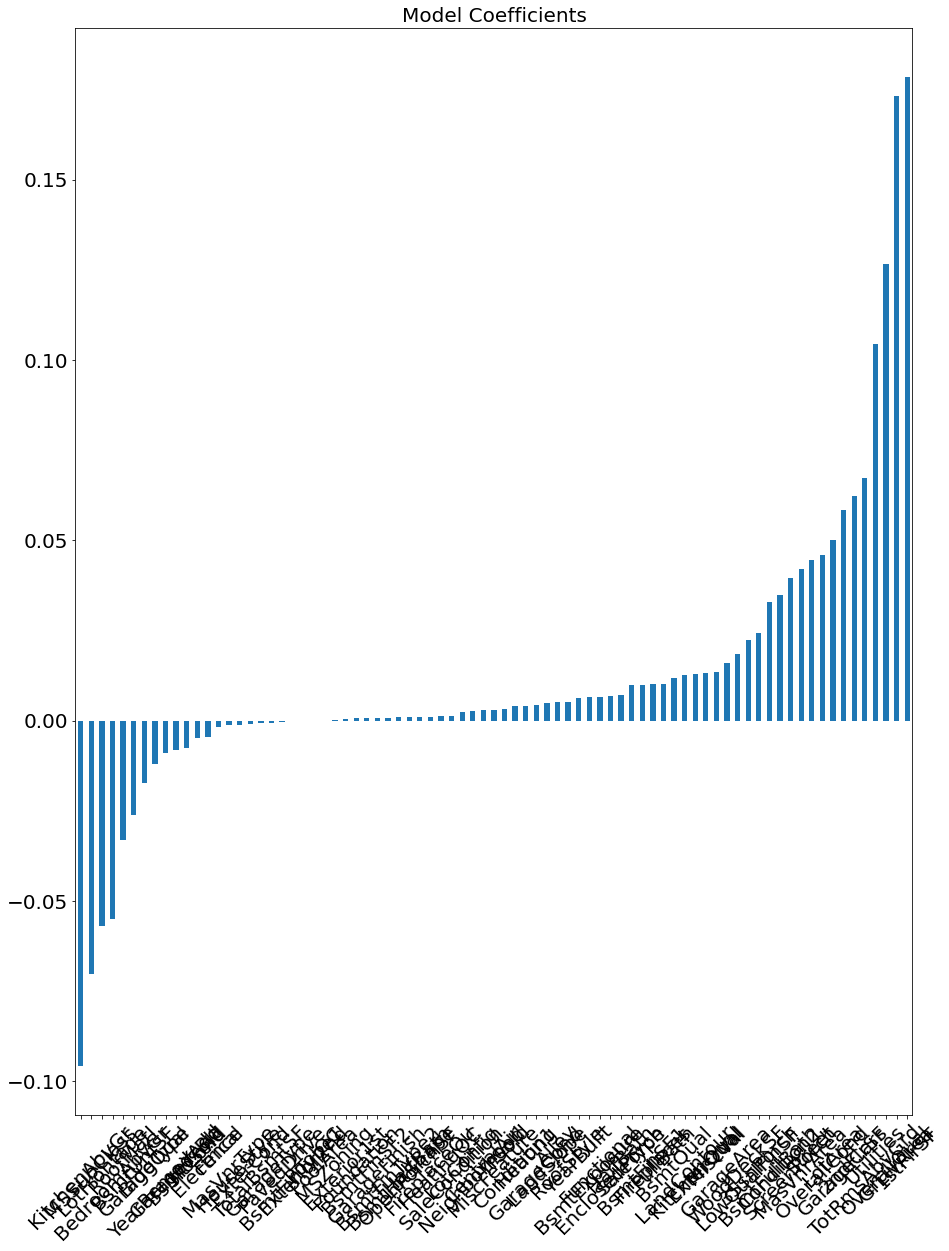

In [294]:
coef=pd.Series(regr.coef_,predictors).sort_values()
coef.plot(kind='bar',fontsize=20, figsize=(15,20))
plt.title('Model Coefficients',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [295]:
#Mean Squared Error
predict= regr.predict(x_test)
#Calculating MSE 
mse= np.mean((predict-y_test)**2)

print('Mean squared Error', mse)

#Accuracy
accuracy=regr.score(x_test,y_test)
print("Accuracy:", accuracy)

Mean squared Error 0.0023009888977894846
Accuracy: 0.8444441634167735


In [296]:
# Ridge Regression
# Alpha = 0.3
from sklearn.linear_model import Ridge
ridge_1=Ridge(alpha=0.3,random_state=0)
ridge_1.fit(x_train,y_train)

Ridge(alpha=0.3, random_state=0)

In [297]:
print('Intercept Coefficient:', ridge_1.intercept_)
comp_param['Ridge']=ridge_1.coef_

Intercept Coefficient: -0.23679155122634202


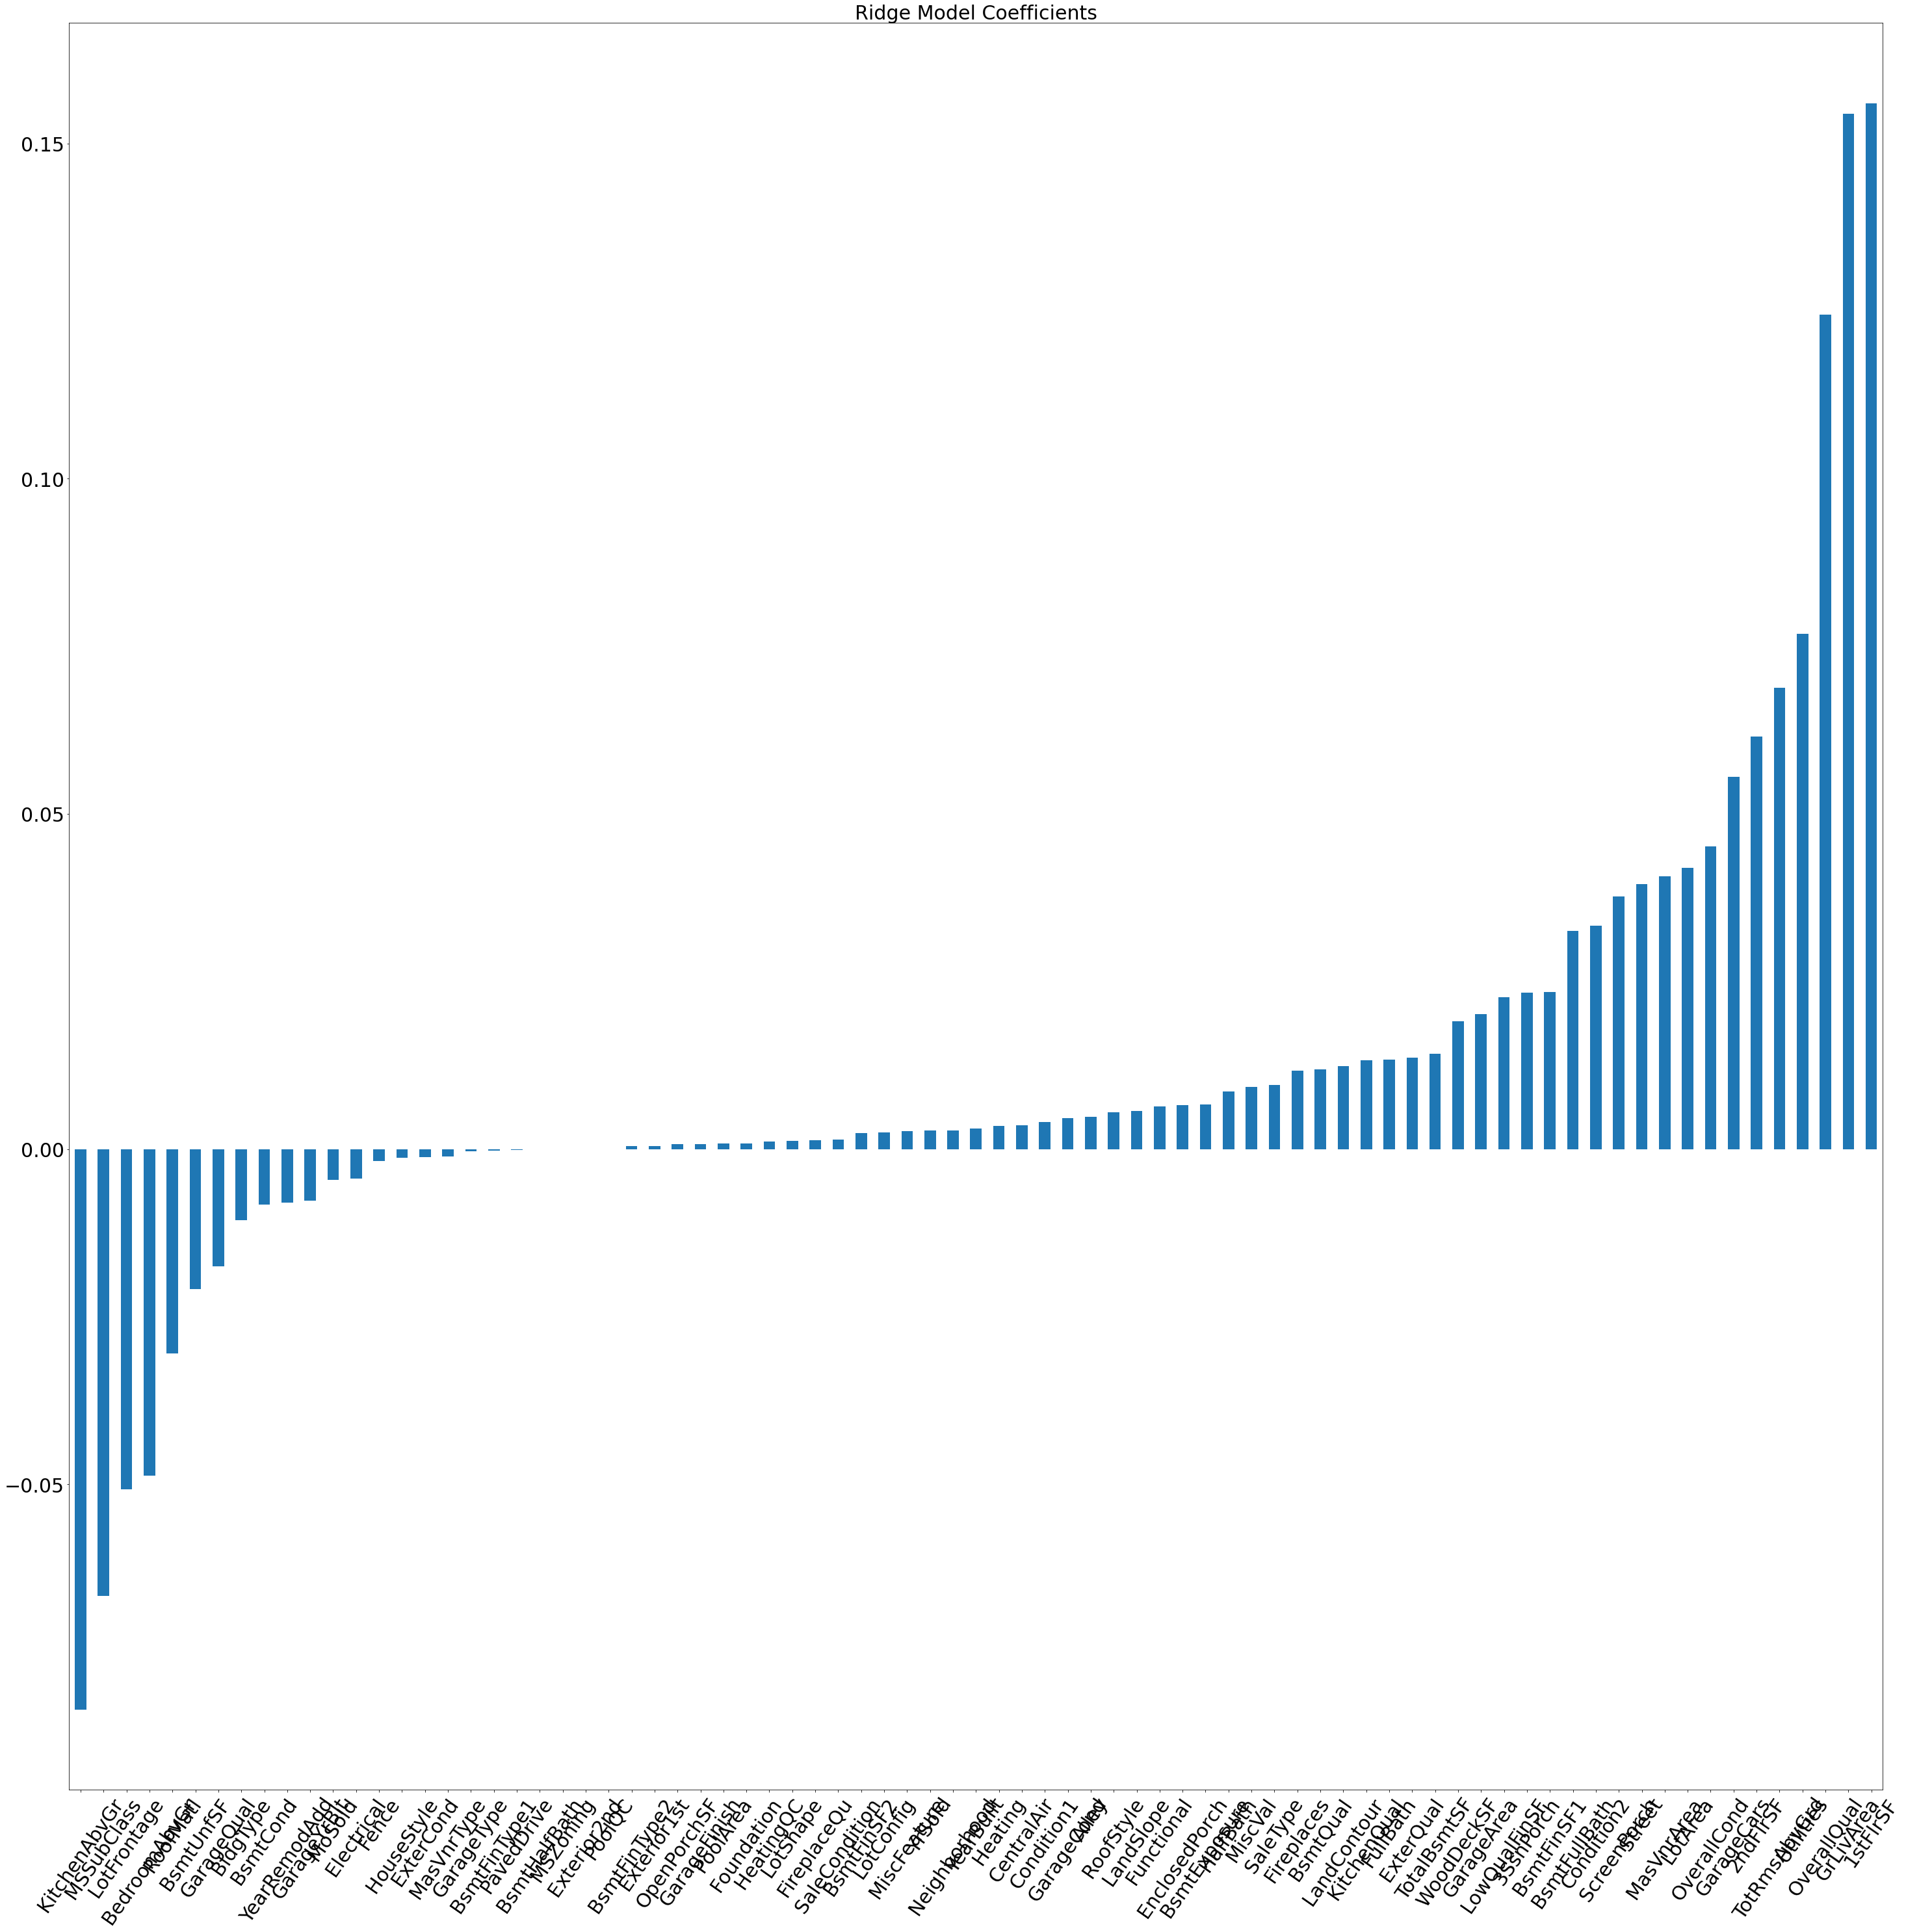

In [298]:
rdge_coef=pd.Series(ridge_1.coef_,predictors).sort_values()
f=rdge_coef.plot(kind='bar',fontsize=30, figsize=(50,50))
plt.title("Ridge Model Coefficients", fontsize=30)
plt.xticks(rotation=55)
plt.show()


In [299]:
# Mean Squared Error and Accuracy error after ridge , alpha=0.3
ridge_predict=ridge_1.predict(x_test)
ridge_mse=np.mean((ridge_predict-y_test)**2)
print("Mean Squared Error", ridge_mse)

# Accuracy Score
score= ridge_1.score(x_test,y_test)
print("Accuracy",score)

Mean Squared Error 0.002309597438586393
Accuracy 0.8438621924360745


In [300]:
# Alpha= 0.03
ridge_1=Ridge(alpha=0.03,random_state=0)
ridge_1.fit(x_train,y_train)

Ridge(alpha=0.03, random_state=0)

In [301]:
print('Intercept Coeff', ridge_1.intercept_)
comp_param['Ridge']=ridge_1.coef_

Intercept Coeff -0.26250832625246256


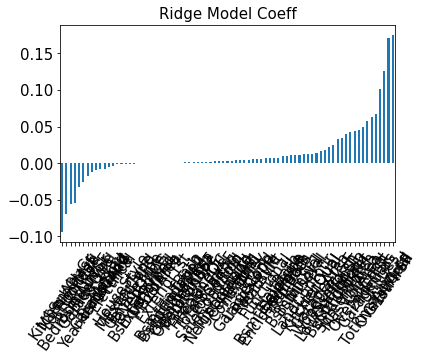

In [302]:
rdge_coef=pd.Series(ridge_1.coef_,predictors).sort_values()
rdge_coef.plot(kind='bar',fontsize=15)
plt.title("Ridge Model Coeff", fontsize=15)
plt.xticks(rotation=55)
plt.show()

In [303]:
#mean Squered Error and Accuracy Score
ridge_predict=ridge_1.predict(x_test)
# calculating MSE
ridge_mse=np.mean((ridge_predict- y_test)**2)
print("Mean Squared Error:", ridge_mse)

# Accuracy Score
score=ridge_1.score(x_test,y_test)
print("Accuracy",score)

Mean Squared Error: 0.0023016643571453386
Accuracy 0.8443984997261408


In [304]:
# Alpha=3
ridge_1=Ridge(alpha=3,random_state=0)
ridge_1.fit(x_train,y_train)

Ridge(alpha=3, random_state=0)

In [305]:
print('Intercept Coeff:', ridge_1.intercept_)
comp_param['Ridge']=ridge_1.coef_

Intercept Coeff: -0.1739240343276153


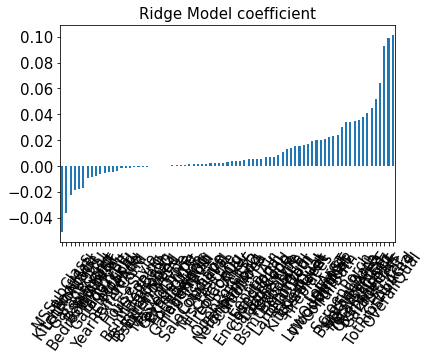

In [306]:
rdge_coef=pd.Series(ridge_1.coef_,predictors).sort_values()
rdge_coef.plot(kind='bar', fontsize=15)
plt.title("Ridge Model coefficient", fontsize=15)
plt.xticks(rotation=55)
plt.show()

In [307]:
# Mean Squared Error and Accuracy
ridge_predict=ridge_1.predict(x_test)
# Calculating MSE
ridge_mse= np.mean((ridge_predict- y_test)**2)
print("Mean Squared Error:",ridge_mse)
# Accuracy Score 
score = ridge_1.score(x_test,y_test)
print("Accuracy",score)

Mean Squared Error: 0.0024032921686441325
Accuracy 0.8375280627357649


In [308]:
# Lasso Regression

# Alpha= 0.3
from sklearn.linear_model import Lasso
l_lasso=Lasso(alpha=0.3, random_state=0)
l_lasso.fit(x_train,y_train)

Lasso(alpha=0.3, random_state=0)

In [309]:
print("Intercept Coefficient:", l_lasso.intercept_)
comp_param['Lasso']=l_lasso.coef_

Intercept Coefficient: 0.16114314928070042


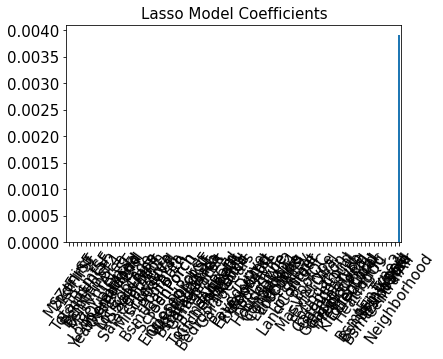

In [310]:
lasso_coef=pd.Series(l_lasso.coef_,predictors).sort_values()
lasso_coef.plot(kind='bar', fontsize=15)
plt.title("Lasso Model Coefficients", fontsize=15)
plt.xticks(rotation=55)
plt.show()

In [311]:
# Mean Squared and Accuracy for alpha=0.3
lasso_predict = l_lasso.predict(x_test)
lasso_mse= np.mean((lasso_predict- y_test)**2)
print("Mean Squared Error:", lasso_mse)
# Accuracy
score=l_lasso.score(x_test,y_test)
print("Accuracy:", score)

Mean Squared Error: 0.011256429840076326
Accuracy: 0.23902137798421264


In [312]:
# Alpha= 0.03

l_lasso=Lasso(alpha=0.03,random_state=0)
l_lasso.fit(x_train,y_train)

Lasso(alpha=0.03, random_state=0)

In [313]:
print("intercept Coeff:", l_lasso.intercept_)
comp_param['Lasso']=l_lasso.coef_

intercept Coeff: 0.06372748820547272


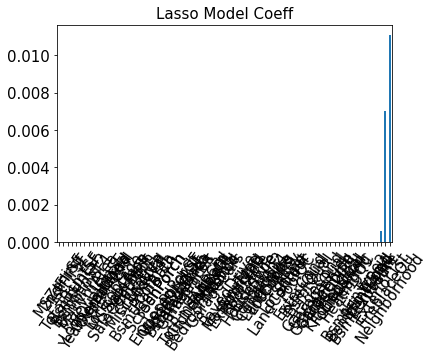

In [314]:
lasso_coef=pd.Series(l_lasso.coef_,predictors).sort_values()
lasso_coef.plot(kind='bar',fontsize=15)
plt.title("Lasso Model Coeff", fontsize=15)
plt.xticks(rotation=55)
plt.show()

In [315]:
# Mean Squere error and accrace for alpha=0.03


lasso_predict = l_lasso.predict(x_test)
lasso_mse= np.mean((lasso_predict- y_test)**2)
print("Mean Squared Error:", lasso_mse)
# Accuracy
score=l_lasso.score(x_test,y_test)
print("Accuracy:", score)


Mean Squared Error: 0.007054282675321916
Accuracy: 0.5231029388675233


In [316]:
# Alpha= 3
l_lasso= Lasso(alpha=3, random_state=0)
l_lasso.fit(x_train, y_train)

Lasso(alpha=3, random_state=0)

In [317]:
print("intercept Coeff:", l_lasso.intercept_)
comp_param['Lasso']=l_lasso.coef_

intercept Coeff: 0.2035016552590679


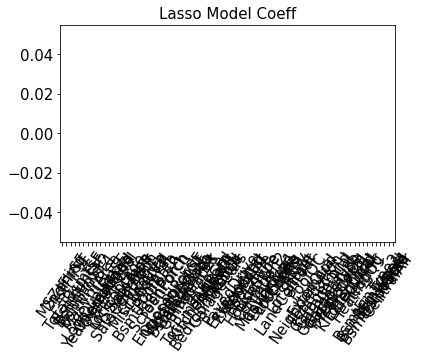

In [318]:
lasso_coef=pd.Series(l_lasso.coef_,predictors).sort_values()
lasso_coef.plot(kind='bar',fontsize=15)
plt.title("Lasso Model Coeff", fontsize=15)
plt.xticks(rotation=55)
plt.show()

In [319]:
# Mean Squere error and accrace for alpha=003

# Mean Squared and Accuracy for alpha=0.3
lasso_predict = l_lasso.predict(x_test)
lasso_mse= np.mean((lasso_predict- y_test)**2)
print("Mean Squared Error:", lasso_mse)
# Accuracy
score=l_lasso.score(x_test,y_test)
print("Accuracy:", score)

Mean Squared Error: 0.01480509862178107
Accuracy: -0.0008824918802494697


In [320]:
# Parameter Tuning, figuring best parameter that can be chosen
from sklearn.model_selection import GridSearchCV
# Simple Linear Regression
params={'fit_intercept': [True, False], 'normalize':[True, False],'copy_X':[True, False]}
grid= GridSearchCV(regr, params, cv=None, scoring = 'neg_mean_squared_error') # Takes all possible combo of params given
grid.fit(x_train,y_train)
predictions= grid.predict
print("Mean Squared Error", grid.best_score_)
print("Residual Sum of squares: %.2f"%np.mean((grid.predict(x_test)-y_test)**2))
l_reg_est=grid.best_estimator_
print(l_reg_est)

Mean Squared Error -0.0025573742917782676
Residual Sum of squares: 0.00
LinearRegression()


In [321]:
# Ridge Regression
params= {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid= GridSearchCV(ridge_1, params, cv=2, scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print("Mean Squared Error:", grid.best_score_)
print("Residual Sum Of Squares: %.2f"% np.mean((grid.predict(x_test)- y_test)**2))
l_rig_est= grid.best_estimator_
print(l_rig_est) #  it seraches and gives best result for respective alpha

Mean Squared Error: -0.002210672663001259
Residual Sum Of Squares: 0.00
Ridge(alpha=2, random_state=0)


In [322]:
# Lasso Regression
params= {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid= GridSearchCV(l_lasso, params, cv=2, scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print("Mean Squared Error:", grid.best_score_)
print("Residual Sum Of Squares: %.2f"% np.mean((grid.predict(x_test)- y_test)**2))
l_lasso_est= grid.best_estimator_
print(l_lasso_est)

Mean Squared Error: -0.0042991153144550385
Residual Sum Of Squares: 0.01
Lasso(alpha=0.01, random_state=0)


In [323]:
# Visualization of Linear Regression Model
max_coef=max(comp_param['Linear Regression'])
comp_param[comp_param['Linear Regression'] == max_coef]



,Linear Regression,Ridge,Lasso
55,0.178357,0.092885,0.0


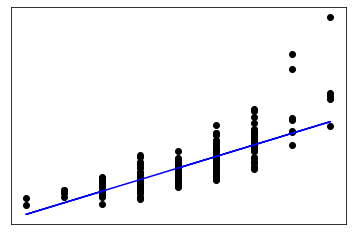

In [324]:


x_train_temp= x_train['OverallQual'].values.reshape(-1,1)
#y_train= y_train.values.reshape(-1,1)
l_reg_vis= LinearRegression()
l_reg_vis.fit(x_train_temp, y_train)


x_test_temp= x_test['OverallQual'].values.reshape(-1,1)
y_pred= l_reg_vis.predict(x_test_temp)
plt.scatter(x_test['OverallQual'],y_test,color='black')
plt.plot(x_test['OverallQual'], y_pred,color='blue')
plt.xticks(())
plt.yticks(())
plt.show()

In [325]:
from sklearn.model_selection import cross_validate
scoring = {'neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'}
comp_scores=pd.DataFrame()
for model in [regr,ridge_1,l_lasso]:
    scores=cross_validate(regr,x_train,y_train,scoring=scoring,cv=5,return_train_score=True)
    score=[]
    for key in scores.keys():
        score.append(scores[key].mean())
    comp_scores[str(model)] = score
    comp_scores['metrics_params'] = scores.keys()
comp_scores= comp_scores.set_index('metrics_params')

In [326]:
comp_scores

,LinearRegression(),"Ridge(alpha=3, random_state=0)","Lasso(alpha=3, random_state=0)"
metrics_params,,,
fit_time,0.010757,0.009991,0.010268
score_time,0.005441,0.004947,0.004742
test_neg_mean_squared_error,-0.002557,-0.002557,-0.002557
train_neg_mean_squared_error,-0.001622,-0.001622,-0.001622
test_r2,0.786479,0.786479,0.786479
train_r2,0.859433,0.859433,0.859433
test_neg_mean_absolute_error,-0.029722,-0.029722,-0.029722
train_neg_mean_absolute_error,-0.026104,-0.026104,-0.026104


In [327]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,RL,65.0,8450,Pave,Rare,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Rare,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Rare,Rare,Rare,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Rare,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Rare,Rare,Rare,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Rare,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Rare,Rare,Rare,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Rare,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Rare,Rare,Rare,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Rare,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Rare,Rare,Rare,0,12,2008,WD,Normal,250000,0,0,0


In [328]:
# Linear Regression using StatsModel
import statsmodels.api as sm
import statsmodels.formula.api as smf


dataset_no_scaled=dataset_no_scaled.drop(dataset_no_scaled[dataset_no_scaled['SalePrice']>438780].index)
dataset_no_scaled = dataset_no_scaled.reset_index(drop=True)
x = dataset_no_scaled[dataset_no_scaled.columns[dataset_no_scaled.columns != 'SalePrice']]
x=sm.add_constant(x)  # Added a constant for intercept


C:\Users\adfatwan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [329]:
dataset_no_scaled.head(2)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,2,0,1,1,0,0,15,4,1,4,5,0,0,9,9,2,2,3,4,3,2,1,6,4,2,4,1,3,2,4,1,3,2,2,2,2,0,3,1,2,3,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,3,1,2,0,1,1,1,0,12,1,1,4,4,0,0,1,2,1,1,3,2,3,2,4,4,4,2,4,1,3,1,4,3,3,2,2,2,2,0,3,1,2,3,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500


In [330]:
# Split the data into train and test
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,dataset_no_scaled.SalePrice,train_size=0.80,test_size=0.2,random_state=100)

In [331]:
print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(1155, 80)
(289, 80)
(1155,)
(289,)


In [332]:
# Fitting the stats model
lr_model=sm.OLS(y_train_1,x_train_1).fit()

In [333]:
np.asarray(data)

array([[1, 60, 'RL', ..., 0, 0, 0],
       [2, 20, 'RL', ..., 0, 0, 0],
       [3, 60, 'RL', ..., 0, 0, 0],
       ...,
       [1458, 70, 'RL', ..., 0, 0, 0],
       [1459, 20, 'RL', ..., 0, 0, 0],
       [1460, 20, 'RL', ..., 0, 0, 0]], dtype=object)

In [334]:
print(lr_model.params)

const            9.181980e+05
MSZoning         9.569617e+02
Street           2.840548e+04
Alley            4.047769e+03
LotShape        -7.596260e+02
LandContour      7.411920e+03
Utilities        7.315493e+04
LotConfig        1.532052e+03
LandSlope        3.040312e+03
Neighborhood     1.976160e+03
Condition1       3.394055e+03
Condition2       1.697500e+04
BldgType        -4.855912e+03
HouseStyle      -1.117277e+03
RoofStyle        1.892985e+03
RoofMatl        -1.532573e+04
Exterior1st      4.269651e+02
Exterior2nd     -1.467337e+02
MasVnrType       3.471842e+02
ExterQual        7.533036e+03
ExterCond       -2.862167e+02
Foundation       6.872294e+02
BsmtQual         7.855736e+03
BsmtCond        -1.533263e+03
BsmtExposure     3.205582e+03
BsmtFinType1     2.616846e+02
BsmtFinType2     2.860917e+02
Heating          3.287429e+03
HeatingQC        7.225484e+02
CentralAir      -3.966372e+02
Electrical      -3.865137e+03
KitchenQual      7.910403e+03
Functional       4.192490e+03
FireplaceQ

In [335]:
lr_model.summary2() # Model explains only R-squared variation in Saleprice, it also gives P values to show significant relation between x and y

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.863     
Dependent Variable:      SalePrice            AIC:                    26802.6097
Date:                    2022-09-17 13:12     BIC:                    27191.6026
No. Observations:        1155                 Log-Likelihood:         -13324.   
Df Model:                76                   F-statistic:            96.99     
Df Residuals:            1078                 Prob (F-statistic):     0.00      
R-squared:               0.872                Scale:                  6.5720e+08
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const         918197.9705 1225495.3038  0.7492 0.4539 -1486428.5199 3322824.4609
MSZoning         956.9617    1315.9334  0.7272 0.4673    -1625.1196    3539.0429
Street         28405.4785   11824.4343  2.4023 0.0165     5203.9633   51606.9937
Alley           4047.7689    2133.7954  1.8970 0.0581     -139.0941    8234.6318
LotShape        -759.6260    1390.7737 -0.5462 0.5850    -3488.5563    1969.3043
LandContour     7411.9196    1866.6692  3.9707 0.0001     3749.2028   11074.6365
Utilities      73154.9281   27116.8080  2.6978 0.0071    19947.2213  126362.6349
LotConfig       1532.0518     728.0369  2.1044 0.0356      103.5218    2960.5817
LandSlope       3040.3119    3589.3349  0.8470 0.3972    -4002.5628   10083.1866
Neighborhood    1976.1598     240.6874  8.2105 0.0000     1503.8909    2448.4286
Condition1      3394.0549     822.4739  4.1266 0.0000     1780.2237    5007.8861
Condition2     16974.9997    9712.7556  1.7477 0.0808    -2083.0491   36033.0485
BldgType       -4855.9119    2113.9722 -2.2971 0.0218    -9003.8785    -707.9452
HouseStyle     -1117.2768     720.9644 -1.5497 0.1215    -2531.9294     297.3758
RoofStyle       1892.9846    1094.6663  1.7293 0.0840     -254.9335    4040.9026
RoofMatl      -15325.7341    6705.5418 -2.2855 0.0225   -28483.1272   -2168.3411
Exterior1st      426.9651     580.7669  0.7352 0.4624     -712.5966    1566.5269
Exterior2nd     -146.7337     622.7610 -0.2356 0.8138    -1368.6949    1075.2275
MasVnrType       347.1842    1104.9038  0.3142 0.7534    -1820.8216    2515.1901
ExterQual       7533.0357    2394.5371  3.1459 0.0017     2834.5540   12231.5174
ExterCond       -286.2167    1163.1979 -0.2461 0.8057    -2568.6054    1996.1719
Foundation       687.2294    1103.5272  0.6228 0.5336    -1478.0753    2852.5341
BsmtQual        7855.7359    1956.4786  4.0152 0.0001     4016.7982   11694.6737
BsmtCond       -1533.2628    2660.7681 -0.5762 0.5646    -6754.1343    3687.6086
BsmtExposure    3205.5823     937.6477  3.4187 0.0007     1365.7608    5045.4038
BsmtFinType1     261.6846     623.8252  0.4195 0.6749     -962.3646    1485.7339
BsmtFinType2     286.0917    1234.5233  0.2317 0.8168    -2136.2492    2708.4327
Heating         3287.4287    3831.8762  0.8579 0.3911    -4231.3524   10806.2098
HeatingQC        722.5484    1077.4096  0.6706 0.5026    -1391.5093    2836.6060
CentralAir      -396.6372    4109.5583 -0.0965 0.9231    -8460.2771    7667.0027
Electrical     -3865.1372    2324.5247 -1.6628 0.0967    -8426.2429     695.9686
KitchenQual     7910.4034    1893.5659  4.1775 0.0000     4194.9108   11625.8960
Functional      4192.4902    1215.0136  3.4506 0.0006     1808.4306    6576.5498
FireplaceQu     2816.7121    1094.7186  2.5730 0.0102      668.6913    4964.7328
GarageType      -313.8458    1111.5311 -0.2824 0.7777    -2494.8555    1867.1640
GarageFinish    2176.5181    1350.6771  1.6114 0.1074     -473.7360    4826.7721
GarageQual     -7422.0970    3184.2673 -2.3309 0.0199   -13670.1614   -1174.0327
GarageC

In [336]:
x.head(2)

,const,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,3,1,2,0,1,1,0,0,15,4,1,4,5,0,0,9,9,2,2,3,4,3,2,1,6,4,2,4,1,3,2,4,1,3,2,2,2,2,0,3,1,2,3,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,1.0,3,1,2,0,1,1,1,0,12,1,1,4,4,0,0,1,2,1,1,3,2,3,2,4,4,4,2,4,1,3,1,4,3,3,2,2,2,2,0,3,1,2,3,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007


In [345]:
x.drop('LotShape',axis=1,inplace=True)
x.drop('LandSlope',axis=1,inplace=True)
x.drop('Condition2',axis=1,inplace=True)
x.drop('Exterior1st',axis=1,inplace=True)
x.drop('Exterior2nd',axis=1,inplace=True)
x.drop('MasVnrType',axis=1,inplace=True)
x.drop('ExterCond',axis=1,inplace=True)
x.drop('Foundation',axis=1,inplace=True)
x.drop('BsmtCond',axis=1,inplace=True)
x.drop('BsmtFinType1',axis=1,inplace=True)
x.drop('BsmtFinType2',axis=1,inplace=True)
x.drop('Heating',axis=1,inplace=True)
x.drop('HeatingQC',axis=1,inplace=True)
x.drop('CentralAir',axis=1,inplace=True)
x.drop('Electrical',axis=1,inplace=True)
x.drop('GarageType',axis=1,inplace=True)
x.drop('GarageFinish',axis=1,inplace=True)

x.drop('PavedDrive',axis=1,inplace=True)
x.drop('GarageCond',axis=1,inplace=True)
x.drop('Fence',axis=1,inplace=True)
x.drop('MiscFeature',axis=1,inplace=True)
x.drop('YearBuilt',axis=1,inplace=True)
x.drop('YearRemodAdd',axis=1,inplace=True)
x.drop('BsmtFinSF1',axis=1,inplace=True)
x.drop('LowQualFinSF',axis=1,inplace=True)
x.drop('BsmtHalfBath',axis=1,inplace=True)
x.drop('FullBath',axis=1,inplace=True)
x.drop('HalfBath',axis=1,inplace=True)
x.drop('BedroomAbvGr',axis=1,inplace=True)
x.drop('Fireplaces',axis=1,inplace=True)
x.drop('GarageYrBlt',axis=1,inplace=True)
x.drop('OpenPorchSF',axis=1,inplace=True)
x.drop('EnclosedPorch',axis=1,inplace=True)
x.drop('MiscVal',axis=1,inplace=True)
x.drop('MoSold',axis=1,inplace=True)
x.drop('YrSold',axis=1,inplace=True)
x.drop('HouseStyle',axis=1,inplace=True)
x.drop('MSZoning',axis=1,inplace=True)
x.drop('PoolQC',axis=1,inplace=True)
x.drop('BsmtFinSF2',axis=1,inplace=True)
x.drop('TotalBsmtSF',axis=1,inplace=True)
x.drop('GrLivArea',axis=1,inplace=True)




In [353]:
# Fitting the stats model again after dropping non significant values
# Split the data into train and test
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x,dataset_no_scaled.SalePrice,train_size=0.80,test_size=0.2,random_state=100)
lr_model2=sm.OLS(y_train_2,x_train_2).fit()
lr_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                 Adj. R-squared:        0.864     
Dependent Variable:      SalePrice           AIC:                   26757.3672
Date:                    2022-09-17 13:26    BIC:                   26949.3377
No. Observations:        1155                Log-Likelihood:        -13341.   
Df Model:                37                  F-statistic:           199.8     
Df Residuals:            1117                Prob (F-statistic):    0.00      
R-squared:               0.869               Scale:                 6.5250e+08
------------------------------------------------------------------------------
                 Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------
const         -178619.3208 31724.9168 -5.6303 0.0000 -240866.4640 -116372.1777
Street          25301.7915 11250.6769  2.2489 0.0247    3226.9504   47376.6327
Alley            3719.3413  1972.0276  1.8860 0.0595    -149.9543    7588.6369
LandContour      7389.8195  1759.2354  4.2006 0.0000    3938.0412   10841.5979
Utilities       65068.2508 26378.0863  2.4668 0.0138   13312.0705  116824.4312
LotConfig        1374.9436   675.2849  2.0361 0.0420      49.9737    2699.9134
Neighborhood     2091.8938   204.3055 10.2390 0.0000    1691.0280    2492.7597
Condition1       3438.9315   788.1586  4.3632 0.0000    1892.4933    4985.3697
BldgType        -3745.1016  2009.1604 -1.8640 0.0626   -7687.2552     197.0521
RoofStyle        1808.3673  1059.8677  1.7062 0.0882    -271.1886    3887.9232
RoofMatl       -12060.0010  6385.6508 -1.8886 0.0592  -24589.2229     469.2208
ExterQual        8111.3458  2270.1263  3.5731 0.0004    3657.1536   12565.5380
BsmtQual         7146.8954  1524.0831  4.6893 0.0000    4156.5072   10137.2836
BsmtExposure     3379.8585   870.7753  3.8814 0.0001    1671.3190    5088.3980
KitchenQual      8405.7424  1768.6132  4.7527 0.0000    4935.5640   11875.9208
Functional       4265.8694  1163.7452  3.6656 0.0003    1982.4966    6549.2422
FireplaceQu      3042.9788   686.8414  4.4304 0.0000    1695.3341    4390.6235
GarageQual      -7896.8909  1798.0972 -4.3918 0.0000  -11424.9194   -4368.8623
SaleType         4817.4573  1954.0779  2.4653 0.0138     983.3805    8651.5341
SaleCondition    3479.9428  1075.4623  3.2358 0.0012    1369.7890    5590.0966
MSSubClass       -207.7762    36.1154 -5.7531 0.0000    -278.6379    -136.9145
LotFrontage      -121.8775    47.1884 -2.5828 0.0099    -214.4655     -29.2895
LotArea             0.3154     0.0923  3.4191 0.0007       0.1344       0.4965
OverallQual      9573.2212  1088.2709  8.7967 0.0000    7437.9359   11708.5066
OverallCond      3387.1926   753.6170  4.4946 0.0000    1908.5282    4865.8571
MasVnrArea         13.9579     5.1190  2.7267 0.0065       3.9140      24.0018
BsmtUnfSF          -7.9827     2.4265 -3.2899 0.0010     -12.7436      -3.2218
1stFlrSF           43.8701     4.0580 10.8107 0.0000      35.9079      51.8323
2ndFlrSF           34.1028     3.6099  9.4470 0.0000      27.0198      41.1857
BsmtFullBath     7458.7565  1992.4321  3.7435 0.0002    3549.4252   11368.0877
KitchenAbvGr   -13667.6837  5952.5948 -2.2961 0.0219  -25347.2106   -1988.1568
TotRmsAbvGrd     2729.4255   914.2151  2.9855 0.0029     935.6532    4523.1978
GarageCars       9566.4837  2430.9983  3.9352 0.0001    4796.6462   14336.3211
GarageArea         13.6730     8.0530  1.6979 0.0898      -2.1278      29.4738
WoodDeckSF         27.9920     6.7648  4.1379 0.0000      14.7189      41.2651
3SsnPorch          56.4387    25.3726  2.2244 0.0263       6.6554     106.2220
ScreenPorch        46.1867    14.0641  3.2840 0.0011      18.5917      73.7816
PoolArea         -142.8070    32.3979 -4.4079 0.0000    -206.3746     -79.2395
-------------------------

In [354]:
# Predict values of test dataset
y_pred_test_2=lr_model2.predict(x_test_2)
y_pred_train_2=lr_model2.predict(x_train_2)

In [355]:
# Measuring Accuracy of predictions
# We will use R squared and RMSE to measure accuracy

from sklearn.metrics import r2_score, mean_squared_error
# R Square for train data
np.abs(r2_score(y_train_2,y_pred_train_2)) # Same output as above summary



0.8687473988449153

In [357]:
# R Square for test data
np.abs(r2_score(y_test_2,y_pred_test_2)) ## shows value*100 percentage of variation in Salesprice data

0.8574566304699167

In [358]:
# RMSE--- average error that the model makes to predict the outcome , so the smaleer the Rmse the better the model is. If value is high, model needs inprovement
np.sqrt(mean_squared_error(y_train_2,y_pred_train_2)) 

25120.43361406565

In [359]:
np.sqrt(mean_squared_error(y_test_2,y_pred_test_2)) 

26014.60586406274

C:\Users\adfatwan\AppData\Local\Temp/ipykernel_15392/3771645402.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train_2.min(),y_train_2.max()],[y_train_2.min(),y_train_2.max()],'k--',c='blue',lw=3)


Text(0, 0.5, 'Predicted')

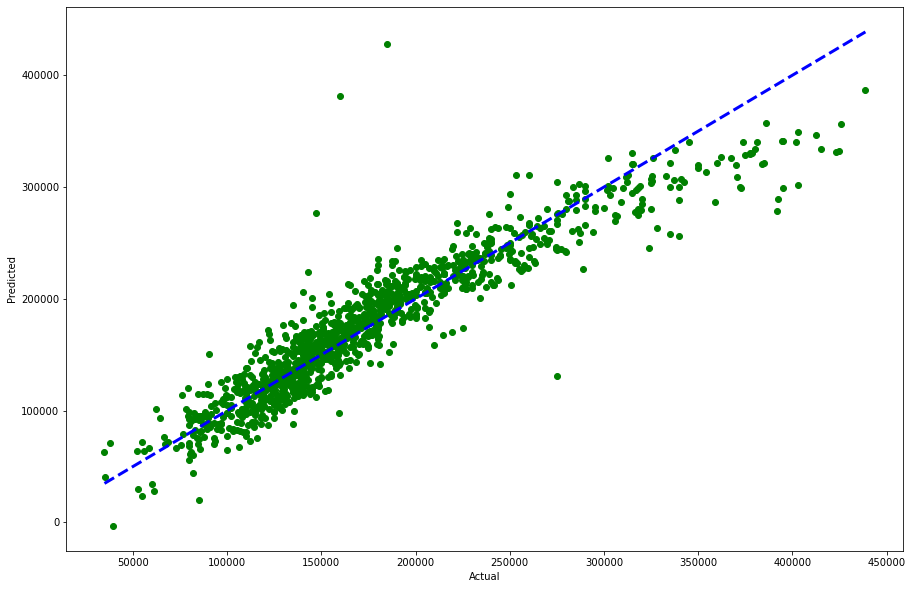

In [360]:
# comparing Actual versus Predicted
plt.figure(figsize=(15,10))
plt.scatter(y_train_2,y_pred_train_2,c='green')
plt.plot([y_train_2.min(),y_train_2.max()],[y_train_2.min(),y_train_2.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [361]:
pred_y_df=pd.DataFrame({'OverallQual':x_train_2['OverallQual'],'original saleprice':y_train_2,'predicted y':y_pred_train_2})

In [362]:
pred_y_df

,OverallQual,original saleprice,predicted y
110,6,136900,142053.713265
198,4,140000,115269.315190
67,7,226000,227509.777405
1170,5,186700,211178.152463
402,6,168000,165847.950714
108,5,115000,96496.139591
869,5,136500,155276.949529
546,5,112500,107087.420563
641,6,155000,156986.279108
354,6,173000,180825.801248
